### 1. Graphical EDA

In [52]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [53]:
data = load_iris()
sns.set()


In [54]:
sepal_lenghts = data['data'][:,2]

Text(0, 0.5, 'Number of flowers')

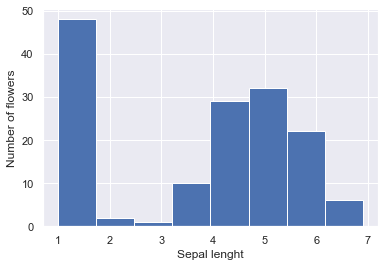

In [55]:
_ = plt.hist(sepal_lenghts,bins=8)
plt.xlabel("Sepal lenght")
plt.ylabel("Number of flowers")


In [75]:
columns = ['sepal length' , 'sepal width' , 'petal length' , 'petal width']
target_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
data['target'] = pd.DataFrame(data['target'])

In [76]:
iris_data = pd.DataFrame(data['data'],columns=columns)
iris_data['type'] = data['target']
iris_data['type'] = iris_data['type'].map(target_map)

In [77]:
iris_data.head()

,sepal length,sepal width,petal length,petal width,type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [139]:
versicolor_petal_length = iris_data[iris_data['type'] == 'versicolor']['petal length']
virginica_petal_length = iris_data[iris_data['type'] == 'virginica']['petal length']
setosa_petal_length = iris_data[iris_data['type'] == 'setosa']['petal length']
versicolor_petal_width = iris_data[iris_data['type'] == 'versicolor']['petal width']

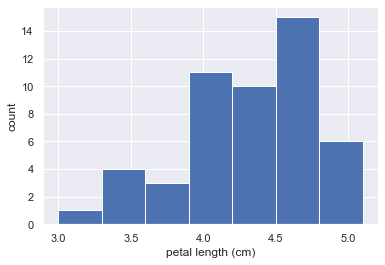

In [113]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

In [114]:
swing_states = pd.read_csv("stats1/2008_swing_states.csv")

Text(0, 0.5, 'Percentage of votes secured by Obama')

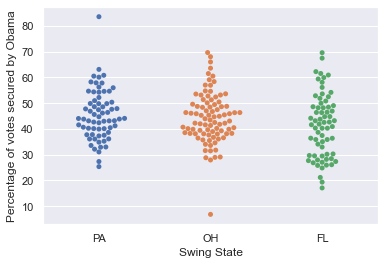

In [115]:
sns.swarmplot(x='state', y='dem_share',data=swing_states)
plt.xlabel("Swing State")
plt.ylabel("Percentage of votes secured by Obama")

In [116]:
swing_states.head(1)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08


In [117]:
print(swing_states.groupby("state")['dem_votes'].sum())
print((swing_states.groupby("state")['rep_votes'].sum()))

state
FL    4282074
OH    2923134
PA    3276363
Name: dem_votes, dtype: int64
state
FL    4045624
OH    2675009
PA    2655885
Name: rep_votes, dtype: int64


c:\users\husnain\dev2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


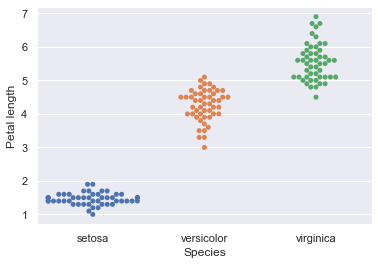

In [118]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='type',y='petal length', data=iris_data)

# Label the axes
plt.xlabel("Species")
plt.ylabel("Petal length")

# Show the plot
plt.show()


In [119]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


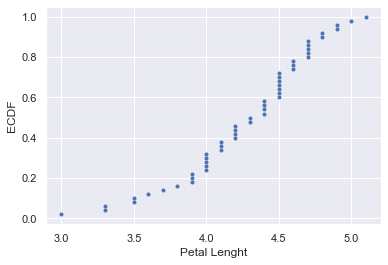

In [120]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker='.',linestyle='none')

# Label the axes
plt.xlabel("Petal Lenght")
plt.ylabel('ECDF')

# Display the plot
plt.show()


In [ ]:
# plotting ecdfs for iris data

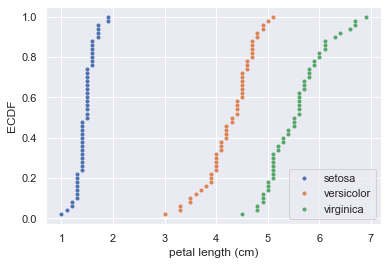

In [121]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
plt.plot(x_set, y_set,marker='.',linestyle='none')
plt.plot(x_vers, y_vers,marker='.',linestyle='none')
plt.plot(x_virg, y_virg,marker='.',linestyle='none')


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [ ]:
# plotting ecdfs for swing_states data

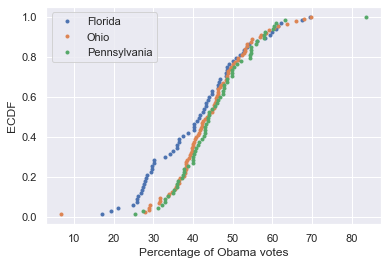

In [122]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(swing_states[swing_states['state']=='FL']['dem_share'])

# Generate plot
plt.plot(x_vers, y_vers, marker='.',linestyle='none',label="Florida")
x_vers, y_vers = ecdf(swing_states[swing_states['state']=='OH']['dem_share'])

# Generate plot
plt.plot(x_vers, y_vers, marker='.',linestyle='none',label="Ohio")
x_vers, y_vers = ecdf(swing_states[swing_states['state']=='PA']['dem_share'])

# Generate plot
plt.plot(x_vers, y_vers, marker='.',linestyle='none',label="Pennsylvania")
plt.legend()

# Label the axes
plt.xlabel("Percentage of Obama votes")
plt.ylabel('ECDF')

# Display the plot
plt.show()


## 2. Quantitative EDA

In [123]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


In [127]:
all_states = pd.read_csv("stats1/2008_all_states.csv")

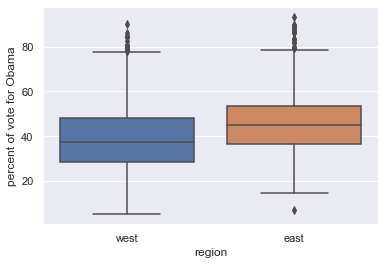

In [128]:
_ = sns.boxplot(x='east_west', y='dem_share',data=all_states)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')
plt.show()


In [129]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


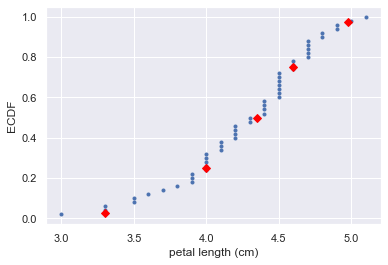

In [131]:
# Comparing the percentiles with ECDF
x_vers, y_vers = ecdf(versicolor_petal_length)

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


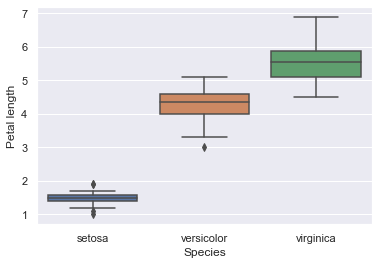

In [132]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='type',y='petal length',data=iris_data)

# Label the axes
plt.xlabel("Species")
plt.ylabel("Petal length")

# Show the plot
plt.show()


In [133]:
# Array of differences to mean: differences
differences = versicolor_petal_length-np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.sum(diff_sq/len(diff_sq))
# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit , variance_np)


0.21640000000000004 0.21640000000000004


In [134]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
std = np.sqrt(variance)
std2 = np.std(versicolor_petal_length)
# Print the standard deviation
print(std)
print(std2)

0.4651881339845203
0.4651881339845203


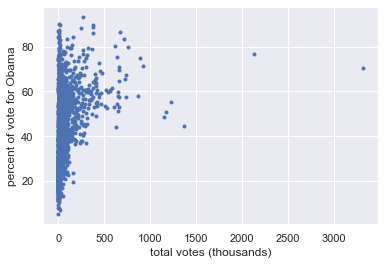

In [138]:
_ = plt.plot(all_states['total_votes']/1000, all_states['dem_share'], marker='.', linestyle='none')

_ = plt.xlabel('total votes (thousands)')

_ = plt.ylabel('percent of vote for Obama')

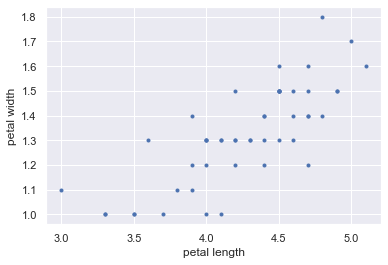

In [140]:
# Make a scatter plot
plt.plot(versicolor_petal_length,versicolor_petal_width,marker='.',linestyle='none')


# Label the axes
plt.xlabel("petal length")
plt.ylabel("petal width")


# Show the result
plt.show()

In [141]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0][1]

# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [142]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


## 3. Discrete Random Variables

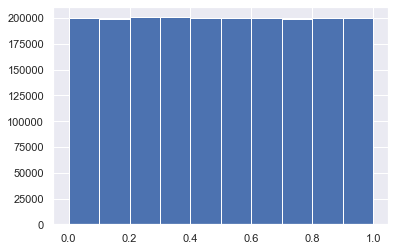

In [154]:
# Simulating the numbers
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(2000000)

# Generate random numbers by looping over range(100000)
for i in range(2000000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers,bins=10)

# Show the plot
plt.show()


In [155]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        num = np.random.random()

        # If less than p, it's a success so add one to n_success
        if num <p:
            n_success += 1

    return n_success

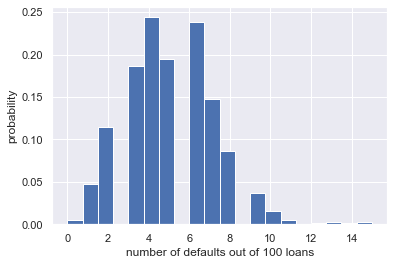

In [175]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(len(n_defaults)):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults,density=True,bins=20)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

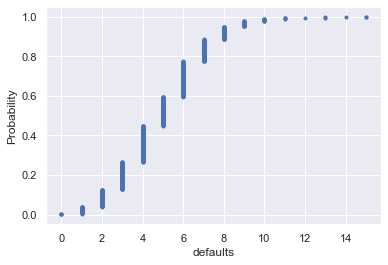

Probability of losing money = 0.022


In [176]:
# Compute ECDF: x, y
x,y=ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x,y,marker='.', linestyle='none')
plt.xlabel("defaults")
plt.ylabel("Probability")


# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lfose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


In [208]:
n_defaults

array([ 2,  1,  6,  4,  4,  2,  7,  4,  4,  5,  8,  7,  4,  2,  5,  4,  4,
        8,  6,  4,  6,  3,  6,  2,  6,  8,  5,  4,  5,  4,  4,  0,  3,  8,
        3,  6,  5,  3,  7,  5,  7,  1,  3,  4,  5,  5,  7,  8,  4,  8,  4,
        2,  5,  6,  4,  3,  2,  5,  4,  4,  3,  2,  6,  4,  3,  5,  8,  3,
        5,  8,  4,  9,  1,  3,  5,  5, 10,  3, 11,  7,  3,  4,  3,  8,  4,
        2,  5,  3,  4,  5,  2,  5,  4,  6,  3,  9,  6,  3,  3,  4,  1,  2,
        6,  4,  3,  4, 10,  8,  3,  2,  4,  1,  3,  6,  2,  3,  4,  6,  5,
        6,  2,  3,  8,  9,  7,  6,  2, 13,  3,  4,  6,  5, 11,  5,  3,  5,
        4,  6,  2,  4,  5,  7,  7,  8,  4,  5,  5,  8,  7,  4,  5,  8, 14,
        6,  2,  8,  5,  4,  4,  7,  8,  6,  2, 10,  5,  7,  6,  4,  8,  4,
       10, 10,  2,  3,  3,  4,  6,  4,  9,  5,  5,  6,  4,  6,  2,  5,  4,
        3,  2,  7,  3,  3,  3, 10,  3,  3,  9,  6,  6,  7,  5,  5, 12,  6,
        6,  2,  2,  5,  6,  6,  7,  6,  2,  7,  7,  4,  4,  5, 11,  6,  7,
        3,  5,  5,  2,  2

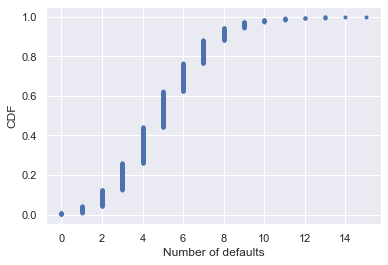

In [207]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100,p=0.05,size=1000)
# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel("Number of defaults")
plt.ylabel("CDF")



# Show the plot
plt.show()


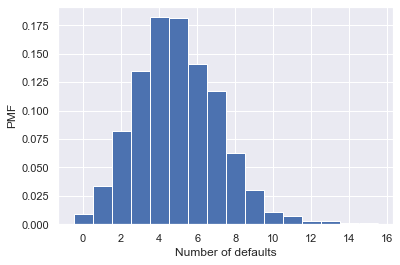

In [210]:
# Compute bin edges: bins
bins = np.arange(max(n_defaults)+1.5) - 0.5

# Generate histogram
plt.hist(n_defaults,density=True,bins=bins)

# Label axes
plt.xlabel("Number of defaults")
plt.ylabel("PMF")


# Show the plot
plt.show()

In [211]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p

n = [20,100,1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0048 3.1854005964713448
n = 20 Binom: 10.0067 2.22806084073124
n = 100 Binom: 10.0229 2.9748236233430707
n = 1000 Binom: 9.9846 3.149470247517827


In [213]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size= 10000) #>= 7

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large = n_large /10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0064


### 4. Continous Random Variables

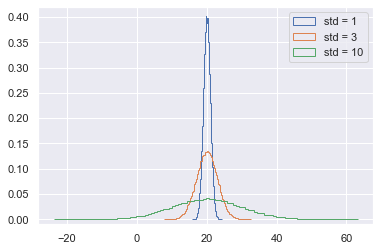

In [216]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20,1,100000)

samples_std3 = np.random.normal(20,3,100000)

samples_std10 = np.random.normal(20,10,100000)
# Make histograms
_ = plt.hist(samples_std1,density=True,histtype='step',bins=100)

_ = plt.hist(samples_std3,density=True,histtype='step',bins=100)

_ = plt.hist(samples_std10,density=True,histtype='step',bins=100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


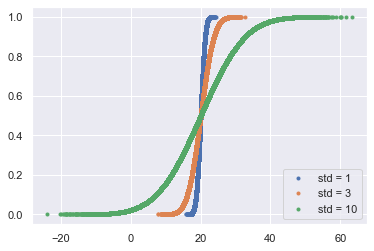

In [217]:
# Generate CDFs

x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)
# Plot CDFs
_ = plt.plot(x_std1,y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3,y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10,y_std10, marker='.', linestyle='none')
# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


In [218]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

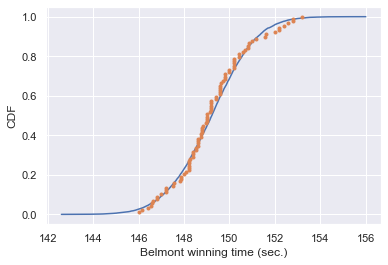

In [220]:
# Compute mean and standard deviation: mu, sigma
mu, sigma = np.mean(belmont_no_outliers), np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma,size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x,y = ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


In [221]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/ len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000607


In [225]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

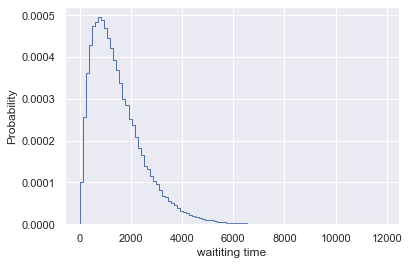

In [228]:
# Draw samples of waiting times: waiting_times
# drawing the PDF of the two poisson processes
waiting_times = successive_poisson(764, 715 , size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True, histtype='step')


# Label axes
plt.xlabel("waititing time")
plt.ylabel("Probability")

# Show the plot
plt.show()


In [229]:
# drawing the CDF of the two poisson processes
x, y =ecdf(waiting_times)

Text(0, 0.5, 'Probability')

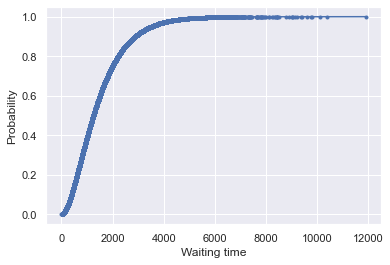

In [233]:
_ = plt.plot(x,y, marker='.')
plt.xlabel("Waiting time")
plt.ylabel("Probability")